In [1]:
import pandas as pd
df=pd.read_csv("test_data.csv")["src"]

In [2]:
with open("C:/ProgramData/Anaconda3/Lib/site-packages/BertSum/results/cnndm_step1000.txt","r") as f:
    file=f.read()

In [3]:
df[0]

'코로나19 신규 환자 수가 64명 추가돼 이달 들어 나흘 연속 두 자릿수를 기록했습니다. 그러나 지역사회에서의 집단 감염이 계속되고 있어 방역 당국은 여전히 긴정하고 있습니다. 이덕영 기자입니다. 오늘 0시 기준 코로나19 신규 확진 환자는 64명입니다. 국내발생 47명 해외 유입 17명입니다. 이달 들어 나흘 연속 하루 신규 환자수가 두 자릿수를 나타내고 있는 겁니다. 하지만 추석 연휴를 받아 진단검사 수가 줄어든 가운데 전국적인 인구 이동으로 조용한 전파가 이뤄스 가능성도 있어 방역당국은 여전히 긴장을 늦추지 못하고 있습니다. 지역별로는 서울과 인천 경기 등 수도권에서 38명 부산 5명 경북 4명 대구 대전 충북 100명 등이 양성 판정을 받았습니다. 종교시설과 요양원 의료기관 등 사양한 장소에서의 집단발생이 계속되고 있는 상황입니다. 어제 정오 기준 서울 도봉구 단화병원 관련 확진자는 46명으로 늘어났고 경기도 포천의 소망공동체 유항원 관련해서도 14명이 확진됐습니다. 또 인천 미추홀구 소망교의 교인 10명과 부산 연재구 건강용품 4명의 관련 24명이 확진 판정을 받았습니다. 추석 귀성의 영향으로 부산을 방문한 서울과 울산 거주자 2명이 확진됐습니다. 한편 위중중증 환자는 105명이고 사망자는 1명이 추가돼 모두 421명으로 늘어났습니다. 엠비씨뉴스 이덕영입니다.'

In [4]:
file.split("\n")[-2::-1][4].split("<q>")

['코로나 19 신규 환자 수가 64 명 추가 돼 이 달 들어 나흘 연속 두 자릿수 를 기록 했습니다 .',
 '그러나 지역 사회 에서의 집단 감염 이 계속 되고 있어 방역 당국 은 여전히 긴 정 하고 있습니다 .',
 '이 덕 영 기자 입니다 .']

In [5]:
text=df[0]

In [67]:
from krwordrank.sentence import summarize_with_sentences
from gensim.summarization.summarizer import summarize
from textrank.textrank import KeysentenceSummarizer
from konlpy.tag import Okt

class Textrank():

    def __init__(self):
        self.okt = Okt()
    
    def summarizer(self, text, option = 'krwordrank'): # 'gensim', 'textrank', 'krwordrank'
        sent_lst = text.split(". ")
        if option == 'krwordrank':
            result = summarize_with_sentences(sent_lst, num_keysents=3)[1]
        elif option == 'gensim':
            result = summarize(text, ratio=3/len(sent_lst)).split("\n")
        else:
            ks_summarizer = KeysentenceSummarizer(tokenize = self.okt.morphs)
            result = list(zip(*ks_summarizer.summarize(sents=sent_lst,topk=3)))[2]
        return result


In [9]:
textrank=Textrank()
textrank.summarizer(text=df[0],option="krwordrank")

['오늘 0시 기준 코로나19 신규 확진 환자는 64명입니다',
 '코로나19 신규 환자 수가 64명 추가돼 이달 들어 나흘 연속 두 자릿수를 기록했습니다',
 '그러나 지역사회에서의 집단 감염이 계속되고 있어 방역 당국은 여전히 긴정하고 있습니다']

In [10]:
textrank=Textrank()
textrank.summarizer(text=df[0],option="gensim")

['코로나19 신규 환자 수가 64명 추가돼 이달 들어 나흘 연속 두 자릿수를 기록했습니다.',
 '그러나 지역사회에서의 집단 감염이 계속되고 있어 방역 당국은 여전히 긴정하고 있습니다.',
 '오늘 0시 기준 코로나19 신규 확진 환자는 64명입니다.']

In [11]:
textrank=Textrank()
textrank.summarizer(text=df[0],option="textrank")

('코로나19 신규 환자 수가 64명 추가돼 이달 들어 나흘 연속 두 자릿수를 기록했습니다',
 '추석 귀성의 영향으로 부산을 방문한 서울과 울산 거주자 2명이 확진됐습니다',
 '종교시설과 요양원 의료기관 등 사양한 장소에서의 집단발생이 계속되고 있는 상황입니다')

In [1]:
import pickle

In [131]:
with open("C:/ProgramData/Anaconda3/Lib/site-packages/BertSum/results/cnndm_list.pickle",'rb') as f:
    file=pickle.load(f)
file

[[0, 1, 2],
 [0, 1],
 [0, 1, 2],
 [0, 3],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 4],
 [0, 3, 4],
 [0, 2],
 [0, 1, 2],
 [0, 2, 3],
 [0, 3, 5],
 [0, 2, 5],
 [0, 2, 5],
 [0, 2, 3],
 [0, 2, 5],
 [0, 2, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 2, 3],
 [0, 1, 3],
 [0, 4],
 [0, 1, 2],
 [0, 1, 4],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 2, 3],
 [0, 4, 6],
 [0, 2, 3],
 [0, 2, 4],
 [0, 1, 4],
 [0, 1, 2],
 [0, 1, 6],
 [0, 1, 3],
 [0, 4, 5],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 2, 3],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1, 3],
 [0, 2, 3],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 4],
 [0, 2, 3],
 [0, 3, 5],
 [0, 1, 2],
 [0, 4, 5],
 [0, 1, 2],
 [0, 3, 5],
 [0, 3, 4],
 [0, 3, 4],
 [0, 4, 6],
 [0, 2, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 3],
 [0, 2, 3],
 [0, 2, 3],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 2, 6],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 4],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 3],
 [0, 1, 2],
 [0, 1,

In [6]:
import pandas as pd
df=pd.read_csv("news1test.csv")
df.dropna(inplace=True)
df["src"]=df["text"].apply(lambda x:".<q>".join(x.split(".")).split("<q>")[:-1])
df["tgt"]=df["summary_text"].apply(lambda x:".<q>".join(x.split(".,")).split("<q>"))

In [7]:
corpus3=df.apply(lambda row: {"src":row["src"],"tgt":row["tgt"]},axis=1).tolist()

In [8]:
corpus3

[{'src': [' 양승동 KBS 사장은 15일 자사의 이른바 검언유착 오보와 관련, 한동훈 검사장을 향해 "피해를 끼친 부분에 대해 사과한다"고 말했다.',
   '양 사장은 이날 국회 과방위 국정감사에서 국민의힘 허은아 의원이 한 검사장에게 사과할 의향이 있느냐고 묻자 "보도 다음날 (뉴스를 통해) 사과했지만, 본인은 그 하루 사이 많은 고통을 당했을 것"이라며 이같이 답했다.',
   '양 사장은 한 검사장이 KBS 기자들을 상대로 손해배상 청구 소송을 낸 것과 관련해선 "(보도 다음날) 뉴스를 통해 사과했는데도 이렇게 거액의 손해배상을 청구하는 것은 합리적이지 않다"라고도 했다.',
   '한 검사장은 앞서 언론 인터뷰에서 "한 사람을 모함하는 허위보도를 하도록 거짓말을 한 사람이 누구인지 숨기고 있으면서, 무슨 사과를 했다는 것인지 모르겠다"고 말했다.',
   '지난 7월 16일 KBS는 유시민 노무현재단 이사장의 신라젠 주가조작 관련 의혹을 제기하기로 한 검사장과 이동재 전 채널A 기자가 공모했다는 검언유착 의혹을 보도했지만, 근거가 된 녹취록 내용을 두고 논란이 일자 이튿날 오보를 인정하고 사과했다.'],
  'tgt': ["양승동 KBS 사장은 15일 자사의 이른바 '검언유착 오보'와 관련, 한동훈 검사장을 향해 피해를 끼친 부분에 대해 사과한다고 말했다.",
   '한 검사장은 앞서 언론 인터뷰에서 한 사람을 모함하는 허위보도를 하도록 거짓말을 한 사람이 누구인지 숨기고 있으면서, 무슨 사과를 했다는 것인지 모르겠다고 말했다.',
   '지난 7월 16일 KBS는 유시민 노무현재단 이사장의 신라젠 주가조작 관련 의혹을 제기하기로 한 검사장과 이동재 전 채널A 기자가 공모했다는 검언유착 의혹을 보도했지만, 근거가 된 녹취록 내용을 두고 논란이 일자 이튿날 오보를 인정하고 사과했다.']},
 {'src': [' 뉴욕증시에서 주요 지수는 15일 미국 실업 지표의 부진과 신종 코로나바이러스 감염증(코로나19)의 가파른 재확산 등으로 하락 출발했다.

In [36]:
from collections import Counter
dic=Counter(sum(answer,[]))

In [127]:
okt=Okt()
ks_summarizer = KeysentenceSummarizer(tokenize = okt.morphs)

In [132]:
answer=[]
krword=[]
gensim_sum=[]
textrank=[]
bertsum=[]
for i,z in enumerate(corpus3):
    if z["src"]:
        try:
            krword_tgt=summarize_with_sentences(z["src"], num_keysents=3)[1]
            gensim_tgt=summarize(" ".join(z["src"]), ratio=3/len(z["src"])).split("\n")
            textrank_tgt=list(zip(*ks_summarizer.summarize(sents=z["src"],topk=3)))[2]
            answer.append([max(range(len(z["src"])), key=lambda i:[len(set(x).intersection(set(y))) for x in z["src"]][i]) for y in z["tgt"]])
            krword.append([max(range(len(z["src"])), key=lambda i:[len(set(x).intersection(set(y))) for x in z["src"]][i]) for y in krword_tgt])
            gensim_sum.append([max(range(len(z["src"])), key=lambda i:[len(set(x).intersection(set(y))) for x in z["src"]][i]) for y in gensim_tgt])
            textrank.append([max(range(len(z["src"])), key=lambda i:[len(set(x).intersection(set(y))) for x in z["src"]][i]) for y in textrank_tgt])
            bertsum.append(file[i])
        except:
            pass
krword
        

[[0, 1, 2],
 [3, 0, 27],
 [0, 5, 18],
 [1, 15, 10],
 [0, 4, 1],
 [2, 1, 13],
 [0, 7, 2],
 [8, 0, 1],
 [1, 0, 2],
 [0, 1, 2],
 [0, 4, 1],
 [0, 4, 14],
 [11, 15, 13],
 [3, 5, 7],
 [1, 0, 5],
 [5, 0, 1],
 [9, 10, 6],
 [1, 2, 3],
 [0, 6, 7],
 [1, 4, 6],
 [0, 2, 6],
 [2, 10, 0],
 [12, 9, 3],
 [0, 2, 3],
 [5, 3, 4],
 [6, 2, 10],
 [0, 2, 13],
 [4, 1, 10],
 [1, 4, 8],
 [4, 1, 8],
 [10, 11, 0],
 [0, 12, 14],
 [1, 7, 5],
 [0, 4, 9],
 [0, 11, 4],
 [0, 2, 6],
 [3, 10, 7],
 [14, 11, 7],
 [8, 5, 1],
 [17, 0, 1],
 [0, 2, 6],
 [0, 7, 8],
 [0, 1, 3],
 [1, 5, 6],
 [1, 0, 6],
 [3, 5, 4],
 [0, 2, 3],
 [4, 1, 9],
 [0, 4, 1],
 [0, 2, 5],
 [10, 0, 1],
 [0, 2, 4],
 [0, 4, 5],
 [0, 8, 3],
 [0, 2, 5],
 [0, 7, 6],
 [0, 4, 5],
 [0, 1, 2],
 [0, 3, 4],
 [0, 6, 4],
 [8, 4, 0],
 [1, 0, 10],
 [1, 0, 5],
 [29, 18, 11],
 [0, 1, 4],
 [10, 9, 0],
 [3, 8, 5],
 [4, 0, 5],
 [4, 0, 2],
 [9, 0, 10],
 [0, 6, 1],
 [1, 0, 2],
 [1, 0, 18],
 [0, 1, 3],
 [2, 0, 5],
 [0, 1, 3],
 [8, 0, 2],
 [5, 11, 6],
 [0, 1, 2],
 [0, 4, 1],
 [2, 0,

In [152]:
import pandas as pd
answer_df=pd.DataFrame(sum(answer[:-2],[]))
bertsum_df=pd.DataFrame(sum(bertsum,[]))
krword_df=pd.DataFrame(sum(krword[:-2],[]))
gensim_df=pd.DataFrame(sum(gensim_sum[:-2],[]))
textrank_df=pd.DataFrame(sum(textrank[:-2],[]))

In [151]:
print(sum([len(set(x).intersection(set(bertsum[i]))) for i,x in enumerate(answer[:-2])])/(3*len(answer[:-2])))
print(sum([len(set(x).intersection(set(krword[i]))) for i,x in enumerate(answer[:-2])])/(3*len(answer[:-2])))
print(sum([len(set(x).intersection(set(gensim_sum[i]))) for i,x in enumerate(answer[:-2])])/(3*len(answer[:-2])))
print(sum([len(set(x).intersection(set(textrank[i]))) for i,x in enumerate(answer[:-2])])/(3*len(answer[:-2])))

0.5217564870259481
0.39401197604790417
0.4415169660678643
0.49181636726546907


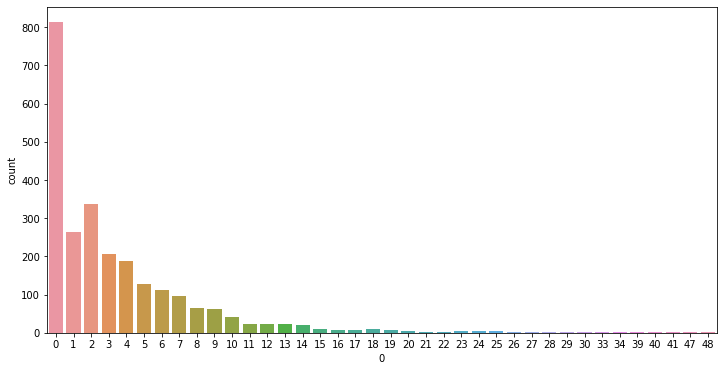

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(0,data=answer_df)

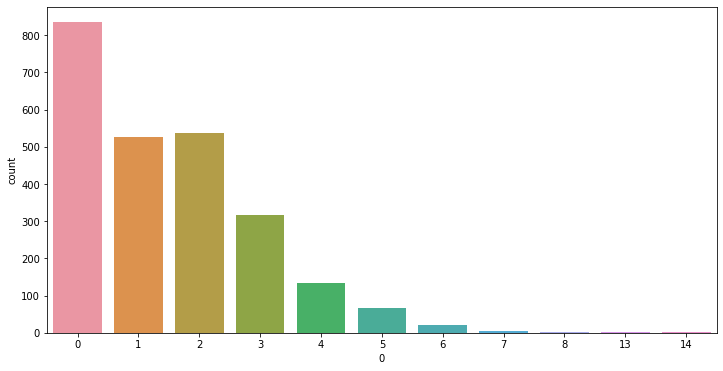

In [154]:
plt.figure(figsize=(12, 6))
sns.countplot(0,data=bertsum_df)

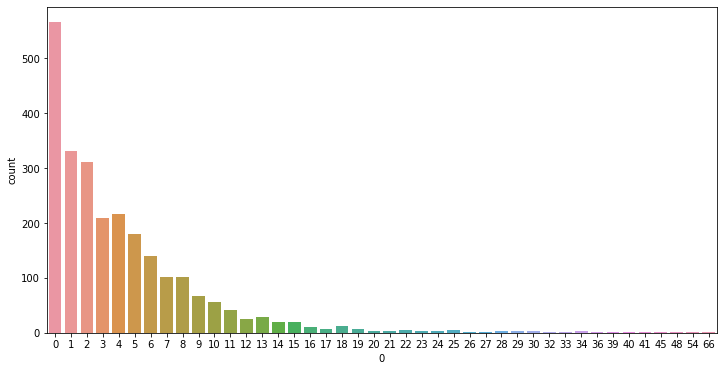

In [155]:
plt.figure(figsize=(12, 6))
sns.countplot(0,data=krword_df)

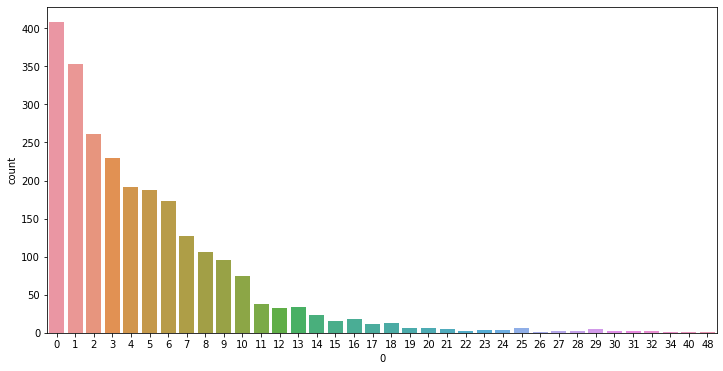

In [156]:
plt.figure(figsize=(12, 6))
sns.countplot(0,data=gensim_df)

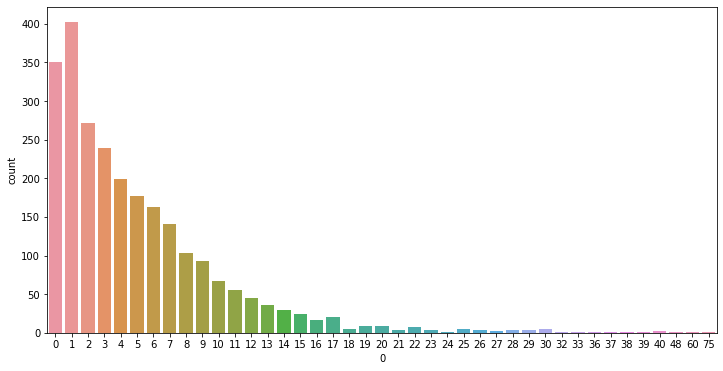

In [157]:
plt.figure(figsize=(12, 6))
sns.countplot(0,data=textrank_df)

In [158]:
len(answer[:-2])

835